SAS & HSE, Applied Time Series Forecasitng , Fall 2022

<font color="blue"> HW #1 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- https://otexts.com/fpp2/expsmooth.html

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл <Surname>_fall2022_hw1.ipynb, например, ivanov_fall2022_hw1.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadilne**: <font color="red"> 11-Dec-2022 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(1/3,\log_2⁡(1.23 + 0.77 * max(0,(1-ДнейПослеДедлайна/14))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже:

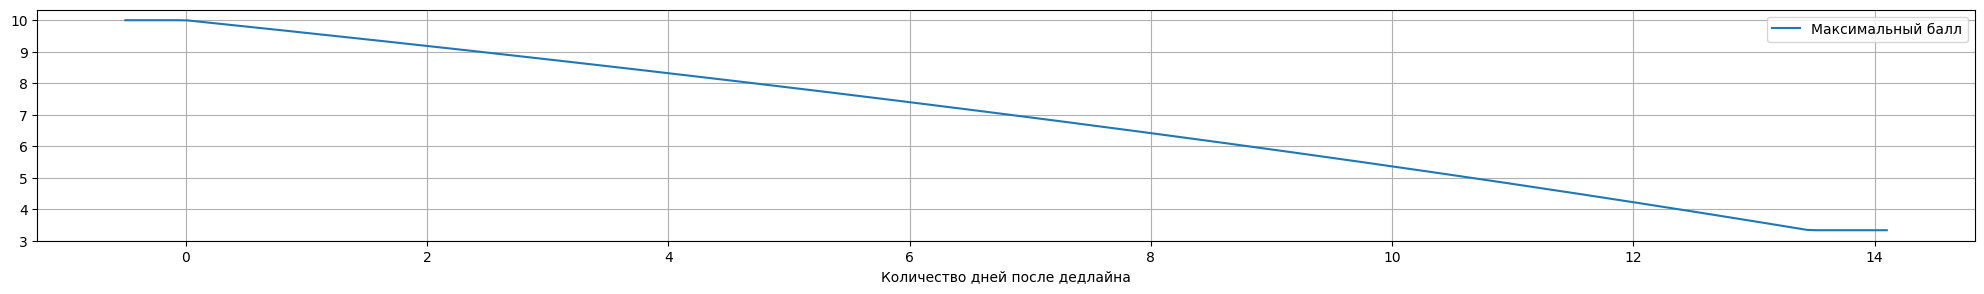

In [129]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(1/3, np.log(a-0.77 + 0.77*max(0, (1-x/14)))/np.log(a)))] for x in np.linspace(-0.5,14.1,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма Simple Exponential Smoothing при изменении параметра $\alpha$ от 0 до 1.

$\alpha$ будет определять, какое значение придается самому последнему наблюдению. Таким образом при меньшей $\alpha$, модель будет «глубже» смотреть в историю и будет менее чувствительной к новой информации. И наоборот, большее значение $\alpha$ ведет к тому, что модель лучше реагирует на новые данные, при этом быстрее забывает историю.

**Вопрос 2**: Докажите равенство выражений в $\color{white}{рекуррентной~форме}$ и в $\color{white} {форме~корректировки~на~ошибку}$ для модели Хольта.

$$l_t = \color{white}{\alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1} )} = \color{white}{\hat y_{t} + \alpha e_t}$$ 

$$e_t = y_t - \hat y_{t} => \alpha e_t = \alpha (y_t - \hat y_{t}) = \alpha y_t - \alpha \hat y_{t}$$

$$\hat y_t = l_{t-1}  + b_{t-1} => l_t = \alpha y_{t} + (1 - \alpha)(l_{t-1}  + b_{t-1})$$

-----------------------

$$b_t = \color{white}{\beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1}} = \color{white}{b_{t-1}+ \alpha\beta e_t}.$$

$$(l_{t} - l_{t-1}) = (b_{t-1} + \alpha e_t) => b_t = \beta (b_{t-1} + \alpha e_t) + (1 - \beta) b_{t-1} = \beta b_{t-1} + \alpha \beta e_t + b_{t-1} - \beta b_{t-1} = b_{t-1} + \alpha \beta e_t $$

**Вопрос 3**: Каким следует выбрать параметр сглаживания тренда $\beta$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

Для плавно изменяющихся временных рядов лучше выбрать небольшой $\beta$, так как их «наклон» практически не меняется. Для случайного временного ряда предлагаю взять большой $\beta$. Так как их «наклон» наоборот меняется и непредсказуем от одной очки к другой.



<h1 align="center"> Practice</h1>

# 1. Reading data (5%)

Download data and prepare for following time series 
 * <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> description of the target ts you can find here  https://docs.google.com/spreadsheets/d/1HwwDZMCVUl-wpdY39TdBBKMwvks9VTe2gIpFtGBu-28/edit#gid=1251818784 </span> sheet "Анализ временных рядов" column C ("ts")



<AxesSubplot: xlabel='Date'>

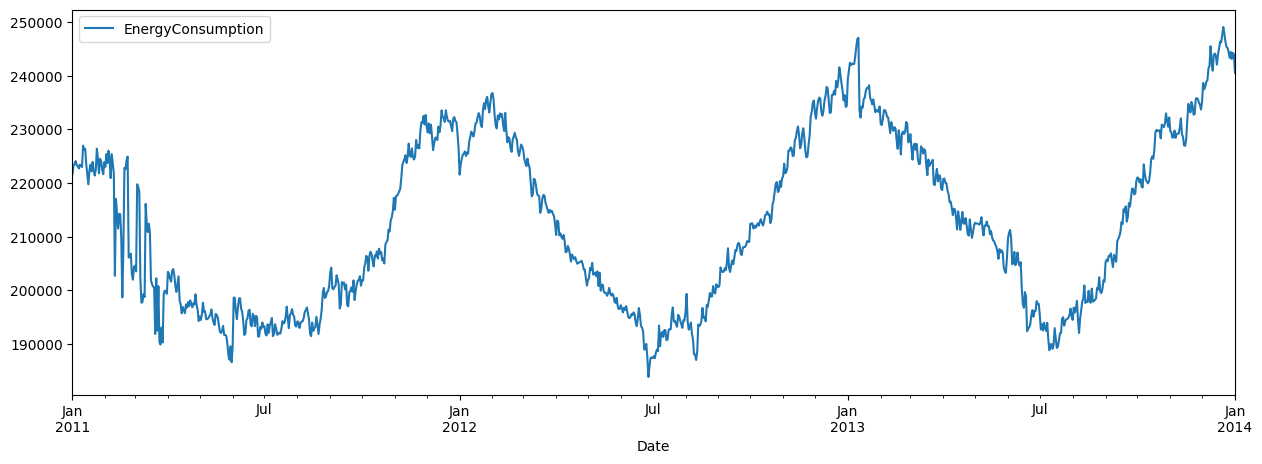

In [130]:
# start with this code
from utils import InitExponentialSmoothing, build_forecast, plot_ts_forecast
from utils import qualityMAPE 
import numpy as np
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
import pandas as pd
import math
import pandas.tseries.offsets as ofs
import warnings as w
from utils import qualityMAPE, SimpleExponentialSmoothing
from matplotlib import gridspec
import seaborn as sns

%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv', parse_dates=['Date'])
ts = df[df.id == 3].drop(columns='id').set_index('Date')['2011-01-01':'2014-01-01']
ts = ts[['EnergyConsumption']]

# Put your code below
ts.plot(figsize=(15,5))


In [131]:
ts.head(32)

,EnergyConsumption
Date,
2011-01-01,221674.040
2011-01-02,223213.661
2011-01-03,223577.825
2011-01-04,224088.360
2011-01-05,223307.167
2011-01-06,223172.785
2011-01-07,222706.644
2011-01-08,223414.448
2011-01-09,223236.154


# 2. Build the Forecast with  SES (20%)

You need to apply SES model for the ts.
You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all points in this task.

* 0) Forecast the ts with SES $\alpha=.1$.
* 1) Split the ts to 4 equal parts: find the best param $\alpha$ of SES for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Is the optimal value close to 0 or 1? (use MAPE as a loss function).
* 2) Draw the forecast that correspond to SES with optimial value $\alpha$
     Conclude whether SES can be used for this TS? If can not than explain why.
* 3) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts.

---



## 1) Search for the optimal $\alpha$ 

In [132]:
def SimpleExponentialSmoothing(x, h=1, Params={}):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    # initialization
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = alpha*x[cntr] + (1-alpha)*y  # = y + alpha*(x[cntr]-y) 
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

def build_forecast(h, ts, alg_name, alg_title, params_array, step='D'):
  'grid'
    
  FRC_TS = dict()

  for p in params_array:
      frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
      frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)
      
      for cntr in ts.columns:
          frc_ts[cntr] = eval(alg_name)(ts[cntr], h, p)
          
      FRC_TS['%s %s' % (alg_title, p)] = frc_ts
  
  return FRC_TS


ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
ESParamsArray = [{'alpha':alpha} for alpha in ALPHA]
FRC_ts = build_forecast(h=1, ts=ts, alg_name='SimpleExponentialSmoothing', alg_title='ES', params_array = ESParamsArray)

In [133]:
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_ts.keys())

ix = ts.loc['2011-01-01':'2014-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_ts[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_ts.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

ES {'alpha': 0.7}     0.006936
ES {'alpha': 0.4}     0.007789
ES {'alpha': 0.2}     0.009950
ES {'alpha': 0.15}    0.011434
ES {'alpha': 0.1}     0.014361
ES {'alpha': 0.05}    0.022649
ES {'alpha': 0.01}    0.055174
dtype: float64

## 2) draw the forecast with optimial value $\alpha $

In [134]:
def plot_ts_forecast(ts, frc_ts, ts_num=0, alg_title=''):
    frc_ts.columns = ts.columns+'; '+alg_title
    ts[ts.columns[0]].plot(style='b', linewidth=1.0, marker='o')
    ax = frc_ts[frc_ts.columns[ts_num]].plot(style='r-^', figsize=(25,5), linewidth=1.0)
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()
    return ax

optimal_params = QualityStr[QualityStr.columns].mean().sort_values().index[0]
optimal_params

"ES {'alpha': 0.7}"

<AxesSubplot: xlabel='Time ticks', ylabel='TS values'>

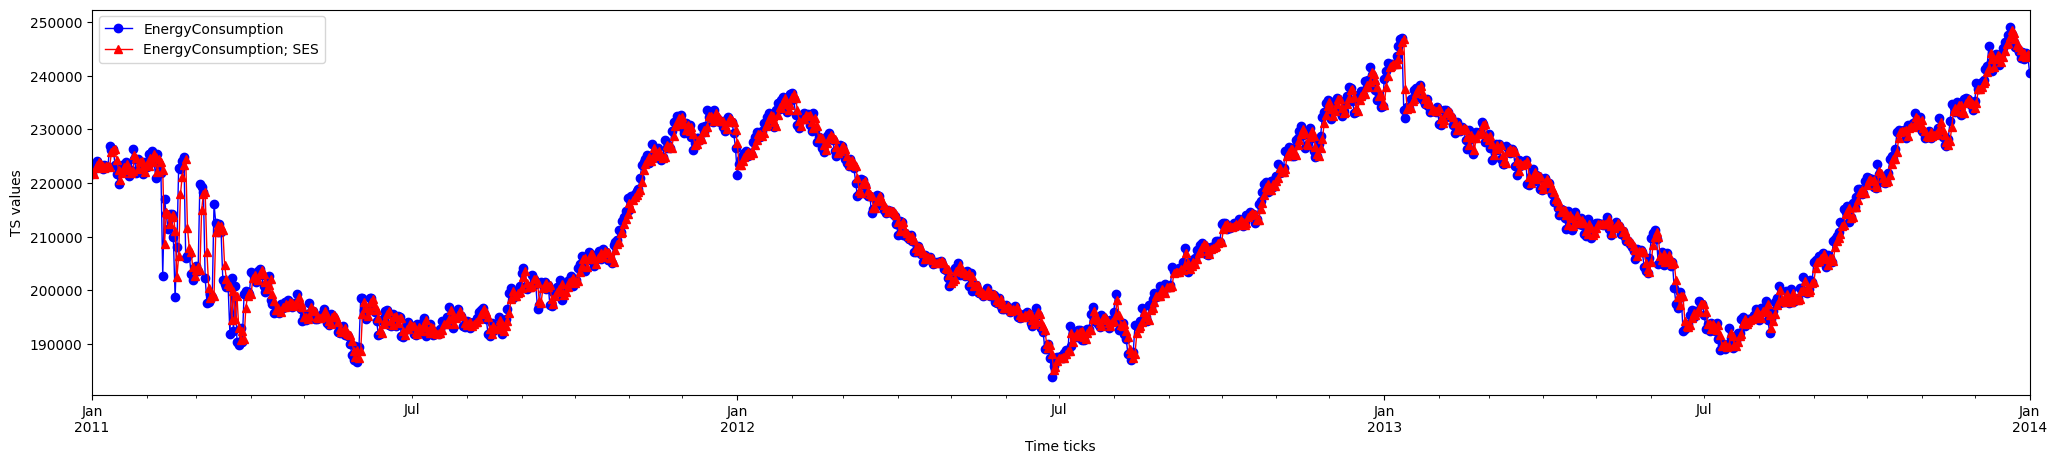

In [135]:

plot_ts_forecast(ts.loc['2011-01-01':'2014-01-01'], FRC_ts[optimal_params].loc['2011-01-01':'2014-01-01'], ts_num=0, alg_title='SES')

### Question: Does SES follow the TS components?

Yes, the version of SES with optimal value of $\alpha = 0.7$ follows the true sequence very closely. 

## 3) Calculate loss of the forecast of TS in 4th part of the time series

In [136]:
qualityMAPE(ts.loc['2013-04-01':'2014-01-01'], FRC_ts[optimal_params].loc['2013-04-01':'2014-01-01'])[0]

EnergyConsumption    0.006111
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then apply it to the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Additive Winters model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ for the whole TS 
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of SES: is it better? 
* 5) Based on results of 3) and 4) conclude whether Additive Winter's ES is appropriate for this TS.

In [137]:
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

# 1. Realize Additive Winters model
def AdditiveWintersExponentialSmoothing(y, h, Params):
    T = len(y)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    s= []
    
    for cntr in range(T):
        if not math.isnan(y[cntr]):
            if math.isnan(l):
                l= y[cntr]
            if len(s)==0:
                # looking in the future
                for i in range(p):
                    s.append(y[i])
            if cntr<p:
                l = alpha*(y[cntr]-s[cntr])+(1-alpha)*l # recurrent smoothing of level 
            else:
                l = alpha*(y[cntr]-s[cntr-p])+(1-alpha)*l # recurrent smoothing of level 
                s.append(gamma*(y[cntr]-l)+(1-gamma)*s[cntr-p])
                
        FORECAST[cntr+h] = l + s[cntr+h-(1+h//p)*p]
    return FORECAST

In [138]:
# 2. Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality)
# for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 
# 1Jul2020 till 30Sep2020). Use MAPE as a loss function.

ALPHA = np.linspace(0.01,1,10)
GAMMA = np.linspace(0.01,1,10)

third_quarter_ts = ts.loc['2012-07-01':'2013-04-01']
wint_params_array = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':7} for alpha in ALPHA for gamma in GAMMA]
FRC_WINTERS_TS = build_forecast(h=1, ts=third_quarter_ts, alg_name= 'AdditiveWintersExponentialSmoothing', alg_title='Winters', params_array=wint_params_array, step='D')

In [139]:
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_WINTERS_TS.keys())

ix = ts.loc['2012-07-01':'2013-04-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_WINTERS_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_ts.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()
optimal_params = QualityStr[QualityStr.columns].mean().sort_values().index[0]
optimal_params

"Winters {'alpha': 0.89, 'gamma': 1.0, 'seasonality_period': 7}"

<AxesSubplot: xlabel='Time ticks', ylabel='TS values'>

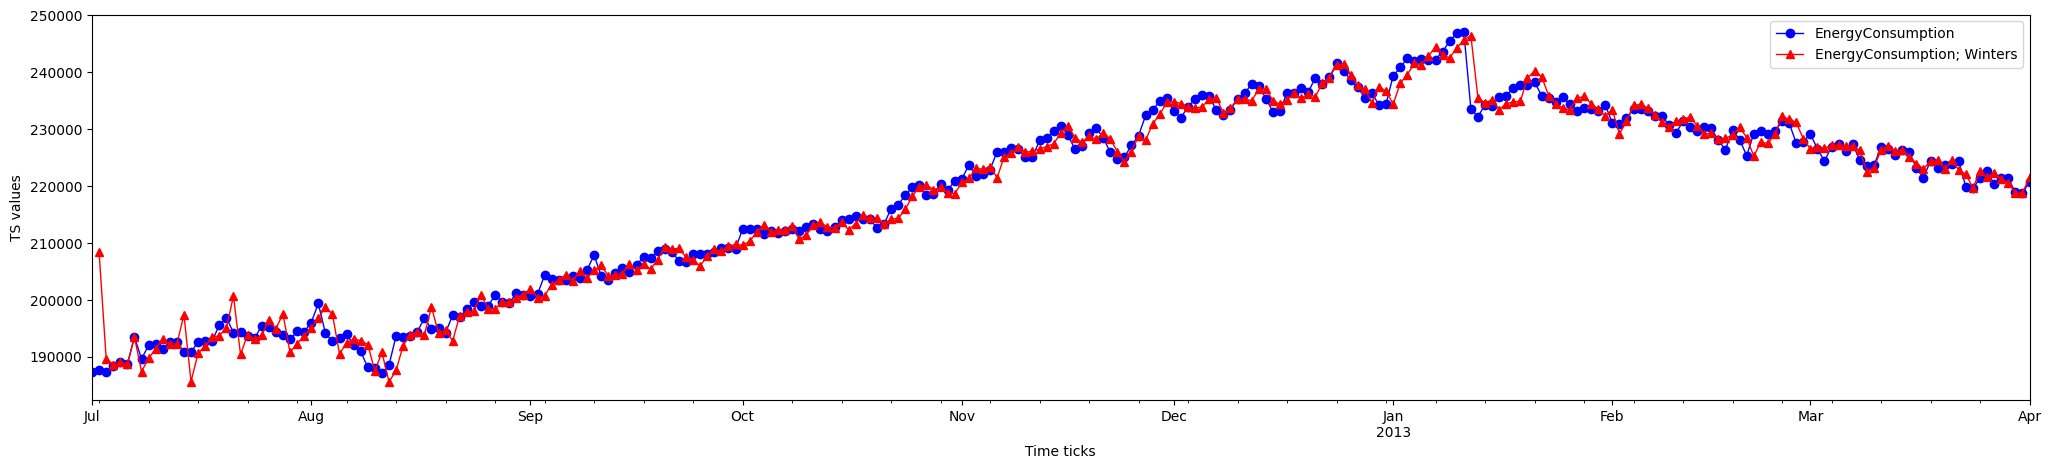

In [140]:

# 3. Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ for the whole TS 
plot_ts_forecast(ts.loc['2012-07-01':'2013-04-01'], FRC_WINTERS_TS[optimal_params].loc['2012-07-01':'2013-04-01'], ts_num=0, alg_title='Winters')

In [141]:
# 4. Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of SES: is it better? 

qualityMAPE(ts.loc['2012-07-01':'2013-04-01'], FRC_WINTERS_TS[optimal_params].loc['2012-07-01':'2013-04-01'])[0]

EnergyConsumption    0.007123
dtype: float64

### Based on results of 3. and 4. conclude whether Additive Winter's ES is appropriate for this TS.

The MAPE demonstrated by SES is slightly better in comparison with Additive Winters: 0.0069(SES) vs. 0.0071(Winters). Although, SES is slightly better Winters shows a pretty close result. Hence, I'd conclude by saying that Additive Winter's ES is appropriate for this TS.

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of Additive Winters model: is it better than the last one? 
* *5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [142]:
# 1. Realize Theil-Wage model

###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - level smoothing parameter
#    beta <scalar in [0,1]> - trend smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

def TWExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    b=np.NaN
    s= []
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
            if math.isnan(b):
                b= 0
            
            if len(s)==0:
                for i in range(p):
                    s.append(x[i])
                    
            if cntr<p:
                l_old=l
                l = alpha*(x[cntr]-s[cntr])+(1-alpha)*(l+b)
                b=beta*(l-l_old)+(1-beta)*b
            else:
                l_old=l
                l = alpha*(x[cntr]-s[cntr-p])+(1-alpha)*(l+b) # recurrent smoothing of level 
                b=beta*(l-l_old)+(1-beta)*b
                s.append(gamma*(x[cntr]-l)+(1-gamma)*s[cntr-p])
                
        FORECAST[cntr+h] = l+b*h + s[cntr+h - (1+h//p)*p]
    return FORECAST

In [143]:
# 2. Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) 
# for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 
# 1Jul2020 till 30Sep2020). Use MAPE as a loss function.

# TW Forecast for monthly agregated data
ALPHA = np.linspace(0.01,1,10)
BETA = np.linspace(0.01,1,10)
GAMMA = np.linspace(0.01,1,10)

tw_params_array = [{'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period':12} for alpha in ALPHA for gamma in GAMMA for beta in BETA]
FRC_TW_TS = build_forecast(h=12, ts=third_quarter_ts, alg_name='TWExponentialSmoothing', alg_title='TW',params_array = tw_params_array, step='M')

In [144]:
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TW_TS.keys())

ix = ts.loc['2012-07-01':'2013-04-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TW_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_ts.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()
optimal_params = QualityStr[QualityStr.columns].mean().sort_values().index[0]
optimal_params

"TW {'alpha': 0.89, 'beta': 0.01, 'gamma': 0.01, 'seasonality_period': 12}"

<AxesSubplot: xlabel='Time ticks', ylabel='TS values'>

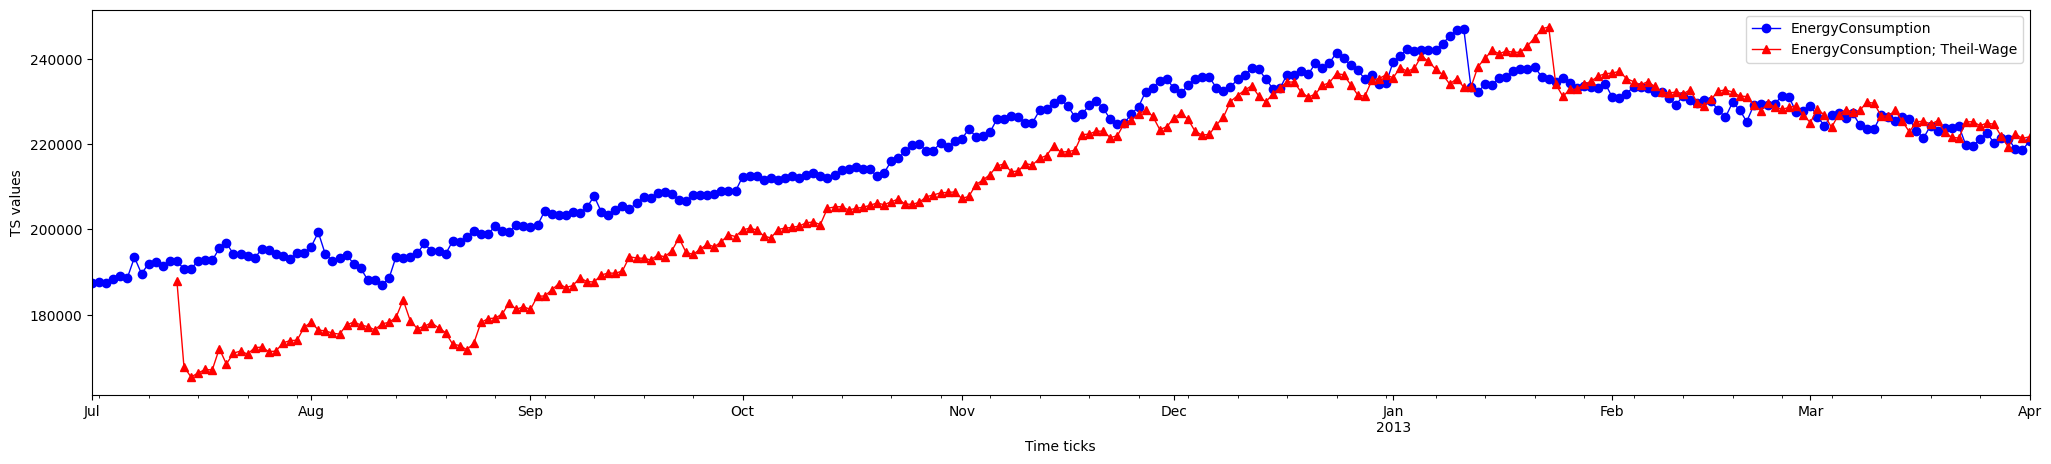

In [145]:

# 3. Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$
plot_ts_forecast(ts.loc['2012-07-01':'2013-04-01'], FRC_TW_TS[optimal_params].loc['2012-07-01':'2013-04-01'], ts_num=0, alg_title='Theil-Wage')

In [146]:
# 4. Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of Additive Winters model: 
# is it better than the last one?

qualityMAPE(ts.loc['2012-07-01':'2013-04-01'], FRC_TW_TS[optimal_params].loc['2012-07-01':'2013-04-01'])[0]

EnergyConsumption    0.044665
dtype: float64

### 5. Suggest how can the Theil-Wage model be improved to make accuracy of forecast better.

The model can be improved by setting more appropriate initial values for the level.


# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) or/and damped-trend component and then use it for forecasting of the ts

You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M), ESM(Md,M) model.
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
Note: if you seelct damped trend model then you can set  $\phi$ value expertly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params. 
* 4) Calculate accuracy of the forecast of TS based on 4-th part of the ts. Compare it with accuracy of Additive Winters model and Theil-Wage model, which model is the best?
* 5) Will be results the same if forecas horizon is different (h = seasonlaity period of data)? Please give reasons for your answer.

In [147]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 

# holt winters 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1 and 2
FRC_HW_TS = ExponentialSmoothing(third_quarter_ts, trend='mul',seasonal='mul', seasonal_periods=12).fit().fittedvalues
FRC_HW_TS = FRC_HW_TS.to_frame()
FRC_HW_TS.rename(columns={ FRC_HW_TS.columns[0]: "EnergyConsumption" }, inplace = True)
FRC_HW_TS

C:\Users\grace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\grace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,EnergyConsumption
Date,
2012-07-01,190899.085935
2012-07-02,186833.409774
2012-07-03,187049.747700
2012-07-04,187758.772181
2012-07-05,188194.845910
...,...
2013-03-28,220660.798248
2013-03-29,222329.507694
2013-03-30,222445.115680


<AxesSubplot: xlabel='Time ticks', ylabel='TS values'>

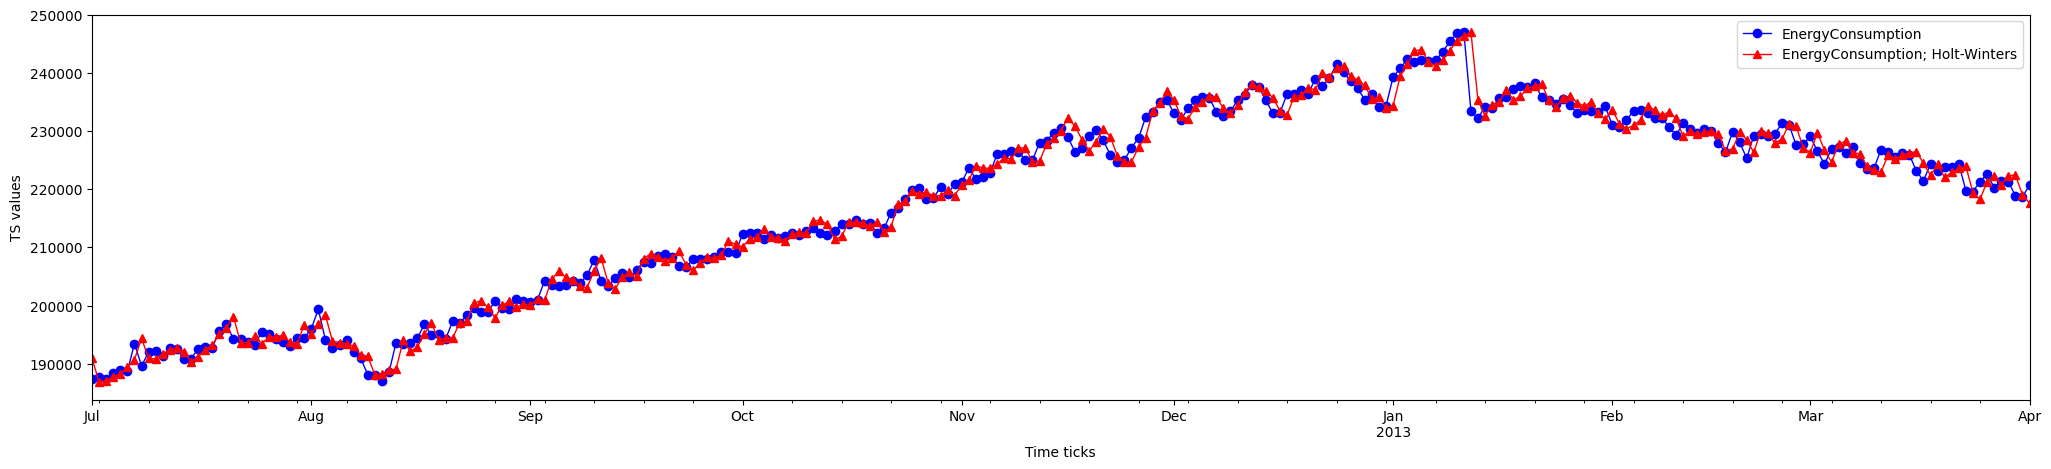

In [148]:
# 3. Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$
plot_ts_forecast(ts.loc['2012-07-01':'2013-04-01'], FRC_HW_TS.loc['2012-07-01':'2013-04-01'], ts_num=0, alg_title='Holt-Winters')

In [128]:
# 4. Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of Additive Winters model: 
# is it better than the last one?

qualityMAPE(ts.loc['2012-07-01':'2013-04-01'], FRC_HW_TS.loc['2012-07-01':'2013-04-01'])[0]

EnergyConsumption    0.006368
dtype: float64

Yes the seasonality matters for Holt-Winters. The level and trend parameters in multiplicative methods are affected by the seasonality.